# Part II: Implementation Task

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 1. (10 marks) Use a Data Cursor to select corresponding points by hand. Select more than four pairs of points. (Four pairs will give a good fit for those points, but may give a poor fit for other points.) Also, avoid choosing three (or more) collinear points, since these do not provide independent information. This is trickier for case C. Make two figures showing the gray-level images of I and  ̃I with a colored square marking each of the selected points. You can convert the image I or  ̃I to grey level using an RGB to Gray function (or the formula gray = 0.2989 ×R + 0.5870 ×G + 0.1140 ×B).

height1:  1000  width1:  1504  Channel1:  3
height2:  1000  width2:  1504  Channel2:  3
height3:  1000  width3:  1504  Channel3:  3
From image1 , x 498  y: 743
From image3 , x 450  y: 948
From image1 , x 596  y: 496
From image3 , x 652  y: 689
From image1 , x 655  y: 548
From image3 , x 690  y: 740
From image1 , x 821  y: 646
From image3 , x 817  y: 838


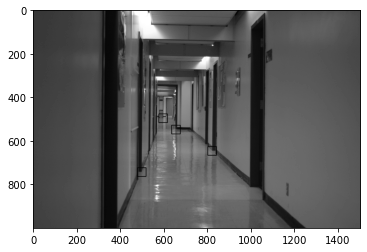

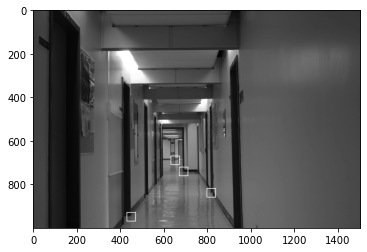

In [2]:
# using data cursor to select corresponding points by hand
image1 = cv2.imread('./hallway1.jpg')
height1, width1, channels1 = image1.shape

image2 = cv2.imread('./hallway2.jpg')
height2, width2, channels2 = image2.shape

image3 = cv2.imread('./hallway3.jpg')
height3, width3, channels3 = image3.shape

print("height1: ", height1, " width1: ", width1, " Channel1: ", channels1)
print("height2: ", height2, " width2: ", width2, " Channel2: ", channels2)
print("height3: ", height3, " width3: ", width3, " Channel3: ", channels3)

image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

class CoordinateStore1:
    def __init__(self):
        self.ori_coordinate = []
        self.pts = np.empty((0,2), int)
        self.res_pts = np.empty((0,2), int)

    def mouse_callback_1(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            print("From image1 , x", x, " y:", y)
            cv2.rectangle(image1_gray, pt1 = (x-20, y -20), pt2 = (x+20, y+20), color=(0,0,255), thickness=2)
            self.pts = np.append(self.pts, np.array([[x,y]]), axis=0)
            cv2.imshow('image1', image1_gray)

    def mouse_callback_3(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            print("From image3 , x", x, " y:", y)
            cv2.rectangle(image3_gray, pt1 = (x-20, y -20), pt2 = (x+20, y+20), color=(255,0,0), thickness=2)
            self.res_pts = np.append(self.res_pts, np.array([[x,y]]), axis=0)
            cv2.imshow('image3', image3_gray)

coordinateCLS1 = CoordinateStore1()

cv2.imshow('image1', image1_gray)
cv2.setMouseCallback('image1', coordinateCLS1.mouse_callback_1)

cv2.imshow('image3', image3_gray)
cv2.setMouseCallback('image3', coordinateCLS1.mouse_callback_3)

if cv2.waitKey(0) & 0xFF == 27: 
    plt.imshow(image1_gray, cmap="gray")
    plt.show()
    plt.imshow(image3_gray, cmap="gray")
    plt.show()
    cv2.destroyAllWindows()


## 2. (10 marks) Fit a homography H to the selected points. Include the estimated H in the report, and describe its effect using words such as scale, shear, rotate, translate, if appropriate. You are not allowed to use any homography estimation function in OpenCV or other similar packages

H is the transformation that maps a projective plane (image1) to another projective plane (image3)
Homography matrix encompassess both part of intrinsic and extrinsic camera matrices, and extrinsic camera matrix tells us the roation and translation of the perspective. 

ref: https://towardsdatascience.com/estimating-a-homography-matrix-522c70ec4b2c

From previous step, we have chosen 4 points from image1 and its corresponding points from image 3

In [3]:
coordinateCLS1.pts

array([[498, 743],
       [596, 496],
       [655, 548],
       [821, 646]])

In [4]:
coordinateCLS1.res_pts

array([[450, 948],
       [652, 689],
       [690, 740],
       [817, 838]])

In [5]:
def get_homograpy_matrix(points, result_points):
    
    A = np.zeros((8,9))
    for i in range(points.shape[0]):
        x, y = points[i]
        x_n, y_n = result_points[i]
        A[2*i] = [x, y, 1, 0, 0, 0, -x_n*x, -x_n*y, -x_n]
        A[2*i+1] = [0, 0, 0, x, y, 1, -y_n*x, -y_n*y, -y_n]

    u, s, v = np.linalg.svd(A)
    # print(v.shape)
    v = v[-1,:]/v[-1,-1]
    H = v.reshape((3,3))
    return H

H = get_homograpy_matrix(coordinateCLS1.pts, coordinateCLS1.res_pts)
print("Estimated H Matrix")
print()
print(H)

Estimated H Matrix

[[ 9.48111684e-01 -5.08494369e-01  2.90080444e+02]
 [ 5.96587158e-02  7.22882414e-01  2.43051550e+02]
 [ 8.35911218e-05 -2.52143037e-04  1.00000000e+00]]


In [6]:
#Verification: Suppose to obtain (446, 946) when multiply Homography matrix with (497, 740, 1).
p = np.array([497, 740, 1])
p_new = np.matmul(H, p)
x_new = p_new[0]/p_new[2]
y_new = p_new[1]/p_new[2]
print(x_new, y_new)

450.3211783808688 944.6476093304184


In [7]:
H_check, _ = cv2.findHomography(coordinateCLS1.pts, coordinateCLS1.res_pts)
print(H_check)
# the value of our H is same as that of H_checked found using open cv library.

[[ 9.48111684e-01 -5.08494369e-01  2.90080444e+02]
 [ 5.96587158e-02  7.22882414e-01  2.43051550e+02]
 [ 8.35911218e-05 -2.52143037e-04  1.00000000e+00]]


## 3. (10 marks) Make a figure showing the  ̃I image with red squares that mark each of the selected ( ̃x,  ̃y), and green squares that mark the locations of the estimated ( ̃x,  ̃y), that is, use the homography to map the selected (x, y) to the ( ̃x,  ̃y) space.

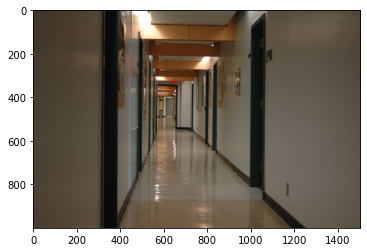

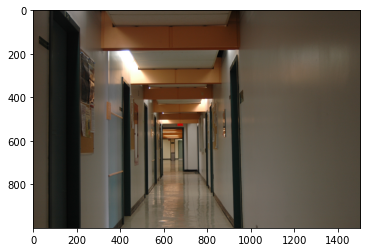

In [16]:
img1 = image1.copy()
img2 = image2.copy()
img3 = image3.copy()

ori_coordinate = np.array([])

class CoordinateStore:
    def __init__(self):
        self.ori_coordinate = []

    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.rectangle(img1, pt1 = (x-20, y -20), pt2 = (x+20, y+20), color=(0,0,255), thickness=2)
            cv2.imshow('image1', img1)
            self.ori_coordinate.append((x,y))
            # print(self.ori_coordinate)

coordinateCLS = CoordinateStore()


cv2.imshow("image1", img1)
cv2.setMouseCallback('image1', coordinateCLS.mouse_callback)

if cv2.waitKey(0) & 0xFF == 27:
    for (x,y) in coordinateCLS.ori_coordinate:   
        p = np.array([x, y, 1])
        p_new = np.matmul(H, p)
        p_new2 = np.dot(H,p)
        assert (p_new == p_new2).all()
        x_new = int(p_new[0]/p_new[-1])
        y_new = int(p_new[1]/p_new[-1])
        cv2.rectangle(img3, pt1 = (x_new-20, y_new-20), pt2=(x_new+20, y_new+20), color=(0,255,0), thickness=2)
    cv2.imshow('image3', img3)

    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))
    plt.show()
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_RGB2BGR))
    plt.show()
    if cv2.waitKey(0):
        cv2.destroyAllWindows()

## 4. (20 marks) Make a figure showing a new image that is larger than the original one(s). The new image should be large enough that it contains the pixels of the I image as a subset, along with all the inverse mapped pixels of the  ̃I image. The new image should be constructed as follows:

(2200, 3004, 3)


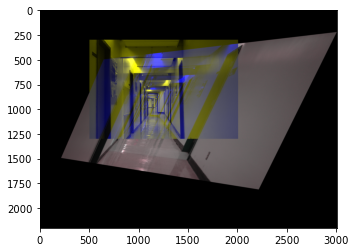

In [837]:
img1 = image1.copy()
img3 = image3.copy()


##################
img3_1 = cv2.copyMakeBorder(img3, 300, 900, 500, 1000, cv2.BORDER_CONSTANT)  
img1_1 = cv2.copyMakeBorder(img1, 300, 900, 500, 1000, cv2.BORDER_CONSTANT) 


out = cv2.warpPerspective(img1_1, H, (img3_1.shape[1],img3_1.shape[0]), dst=img3_1.copy(), borderMode=cv2.BORDER_TRANSPARENT)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

print(out.shape)
out[:, :, 0] = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
out[300:300+1000, 500:500+1504,1] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
out[300:300+1000, 500:500+1504,2] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()



### From the result we could estimate the relative 3d position and the orientation of the camera. For instance for case C, by looking at the result(in the above figure) we could see that transform of image 1 was done more towards right side, with some rotation+other effect towards clockwise, indicating that image 3 is taken from relatively right with the anti-clockwise rotation of the camera. From the image it seems like the floor of the image creates specular highlights, which indicates that floor shows less property of lambertian reflectance. However the rightside of the wall seems to be made up of more "matte" surface, which is more lambertain than the floor.

Case A


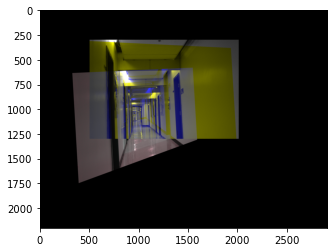

Case B


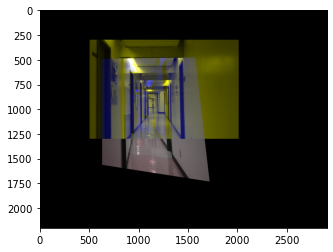

Case C


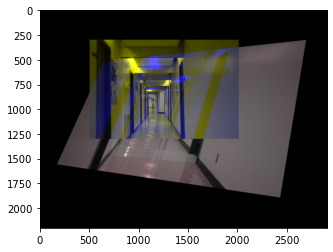

'default'

In [838]:
# The homography matrix H for each of the case was obtained from previous task.

class Cases:
    def switch(self, arg):
        self.case_name = "case_" + str(arg)
        self.case = getattr(self, self.case_name, lambda:"default")
        return self.case()

    def case_A(self):
        print("Case A")
        img1 = image1.copy()
        img2 = image2.copy()
        H = np.array([[1.63236695e+00,  7.70727566e-02, -4.44483912e+02],
                      [2.02470847e-01,  1.34213979e+00,  2.66581300e+02],
                      [4.24201823e-04, -2.37384148e-06,  1.00000000e+00]])
        img2_1 = cv2.copyMakeBorder(img2, 300, 900, 500, 900, cv2.BORDER_CONSTANT)  
        img1_1 = cv2.copyMakeBorder(img1, 300, 900, 500, 900, cv2.BORDER_CONSTANT) 


        out = cv2.warpPerspective(img1_1, H, (img2_1.shape[1],img2_1.shape[0]), dst=img2_1.copy(), borderMode=cv2.BORDER_TRANSPARENT)
        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

        out[:, :, 0] = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,1] = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,2] = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        plt.show()
        
    def case_B(self):
        print("Case B")
        img1 = image1.copy()
        img3 = image3.copy()
        H = np.array([[ 4.51827364e-01, -6.91223683e-02,  3.76442512e+02],
                      [-4.82466558e-02,  8.21944364e-01,  2.35236015e+02],
                      [-8.10808765e-05, -1.08193344e-04,  1.00000000e+00]])
        img3_1 = cv2.copyMakeBorder(img3, 300, 900, 500, 900, cv2.BORDER_CONSTANT)  
        img1_1 = cv2.copyMakeBorder(img1, 300, 900, 500, 900, cv2.BORDER_CONSTANT) 


        out = cv2.warpPerspective(img1_1, H, (img3_1.shape[1],img3_1.shape[0]), dst=img3_1.copy(), borderMode=cv2.BORDER_TRANSPARENT)
        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

        out[:, :, 0] = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,1] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,2] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        plt.show()

    def case_C(self):
        print("Case C")
        img1 = image1.copy()
        img3 = image3.copy()
        H = np.array([[ 6.82279843e-01, -4.28607765e-01,  3.45679927e+02],
                      [-1.85768076e-01,  7.25324576e-01,  3.32608006e+02],
                      [-1.87561263e-04, -1.13087732e-04,  1.00000000e+00]])
        img3_1 = cv2.copyMakeBorder(img3, 300, 900, 500, 900, cv2.BORDER_CONSTANT)  
        img1_1 = cv2.copyMakeBorder(img1, 300, 900, 500, 900, cv2.BORDER_CONSTANT) 


        out = cv2.warpPerspective(img1_1, H, (img3_1.shape[1],img3_1.shape[0]), dst=img3_1.copy(), borderMode=cv2.BORDER_TRANSPARENT)
        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

        out[:, :, 0] = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,1] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        out[300:300+1000, 500:500+1504,2] = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        plt.show()
        
    def case_default(self): 
        print("Choose the case from A, B, C")

case = Cases()
case.switch('A')
case.switch('B')
case.switch('C')
case.switch('')

# Question5: Mean Shift Tracking

## 1. (10 marks) Performance Evaluation

In [839]:
def calc_IOU(boxA, boxB):
    rect1_area = (boxA[1] - boxA[0]) * (boxA[3] - boxA[2])
    rect2_area = (boxB[1] - boxB[0]) * (boxB[3] - boxB[2])

    intersection_x_len = min(boxA[1], boxB[1]) - max(boxA[0], boxB[0])
    intersection_y_len = min(boxA[3], boxB[3]) - max(boxA[2], boxB[2])


    if(intersection_x_len > 0 and intersection_y_len > 0):
        intersection_area = intersection_x_len * intersection_y_len
        union_area = rect1_area + rect2_area - intersection_area
        iou = intersection_area/union_area
        return iou
    else:
        return 0 

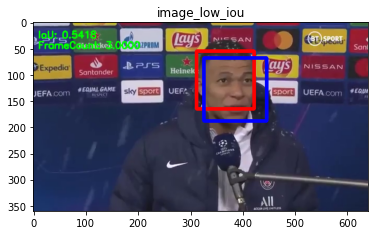

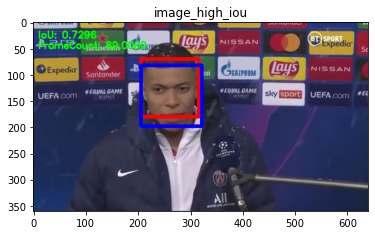

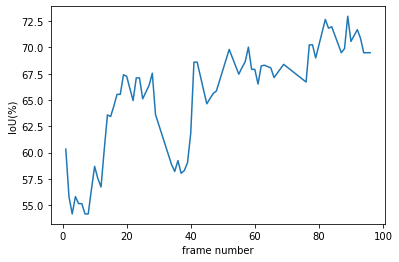

In [840]:
cap = cv2.VideoCapture('./KylianMbappe.mp4')
# cap = cv2.VideoCapture(0)

ret, frame = cap.read()

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
face_boxes = face_detector.detectMultiScale(frame)

if len(face_boxes) == 0:
    print('no face detected')
    assert(False)

(x, y, w, h) = tuple(face_boxes[0])
track_window = (x, y, w, h)

roi = frame[y:y+h, x:x+w]

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180.,255.,255.)))

roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180], [0,180])

cv2.normalize(roi_hist, roi_hist,0,255,cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

graph_list = np.zeros(shape=(1,2))
frame_cnt_ori = cap.get(cv2.CAP_PROP_POS_FRAMES)

while True:

    ret, frame = cap.read()

    if ret == True:
        # print(frame)
        frame_cnt = cap.get(cv2.CAP_PROP_POS_FRAMES) - frame_cnt_ori
        
        boxA = []
        boxB = [] 
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist,[0,180], 1)

        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        x, y, w, h = track_window
        boxA = [x, x+w, y, y+h]
        img = cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 5)

        face_boxes = face_detector.detectMultiScale(frame)
        if len(face_boxes) != 0:
            (x, y, w, h) = tuple(face_boxes[0])
            boxB = [x, x+w, y, y+h]
            # print(boxB)
            img = cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),5)
            iou = calc_IOU(boxA, boxB)
        else:
            iou = 0
        if iou!=0:
            graph_list = np.concatenate((graph_list, np.array([[frame_cnt, iou]])), axis=0)

        cv2.putText(img, "IoU: {:.4f}".format(iou), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        cv2.putText(img, "FrameCount: {:.4f}".format(frame_cnt), (10, 50),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        if frame_cnt == 3 or frame_cnt == 89:
            if frame_cnt==3:
                # cv2.imwrite('image_low_iou.jpg', img)
                plt.title("image_low_iou")
                plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
                plt.show()
            if frame_cnt==89:
                # cv2.imwrite('image_high_iou.jpg', img)
                plt.title("image_high_iou")
                plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
                plt.show()


        cv2.imshow('mean shift tracking demo', img)
        
        if cv2.waitKey(1) & 0xFF == 27:
            break
    else:
        break

plt.plot(graph_list[1:,0], graph_list[1:,1]*100)
plt.xlabel("frame number")
plt.ylabel("IoU(%)")
plt.show()

cv2.destroyAllWindows()
cap.release()



# BLUE = Viola-Jones detected box 
# RED = tracked bounding box

## In your report, include a sample frame in which the IoU is large (e.g. over 50%) and another sample frame in which the IoU is low (e.g. below 10%). Draw the tracked and detected bounding boxes in each frame using different colours (and indicate which is which).

In [841]:
# print(max(graph_list[1:,1]))
print(np.where(graph_list[1:,1] == max(graph_list[1:,1]))[0]) #res = 62
print(np.where(graph_list[1:,1] == min(graph_list[1:,1]))[0]) #res = 2, 6, 7

print("Highest IoU at frame number:", graph_list[1:,0][62])
print("lowest IoU at frame number:", graph_list[1:,0][2])

[62]
[2 6 7]
Highest IoU at frame number: 89.0
lowest IoU at frame number: 3.0


New threshhold:  IoU large(over 65%), and IoU small(below55%)

Sample frame of high IoU and low IoU are included in the result folder and also above. Here the blue is Viola-Jones detected box, and red is tracked bounding box

## Report the percentage of frames in which the IoU is larger than 65%.

In [842]:
larger_then_50 = 0
for i in graph_list[1:,1]:
    if i > 0.65:
        larger_then_50+=1
    
print("percentage of frames in which the IoU is larger than 65%: ", ((larger_then_50)/len(graph_list[1:,1]))*100,"%")

percentage of frames in which the IoU is larger than 65%:  62.31884057971014 %


## Look at the detected and tracked boxes at frames in which the IoU is small (< 10%) and report which (Viola-Jones detection or tracked bounding box) is correct more often (we don’t need a number, just eyeball it). Very briefly (1-2 sentences) explain why that might be.

It looks like the tracked bounding box was correct more than Viola-Jones detection. Since the movement of the face in the video was small, tracking worked really well. On the other hand Viola-Jones detection seems to confuse the face with other logo and some positions on his cloth. Also for Viola-Jones detection, it has to detect the face on every scene and there are various factor that effect the detection(background color, cloth, shape of other object, etc). On the other hand under the same lighting and background condition, tracking just need to track the first detected face, thus in this case much more accurate for this specific case. 

# 2. (10 marks) Implement a Simple Variation

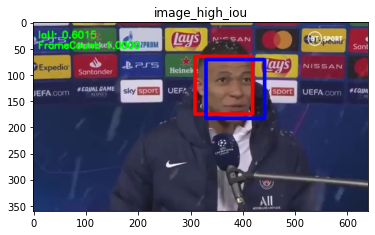

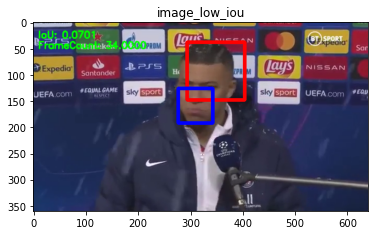

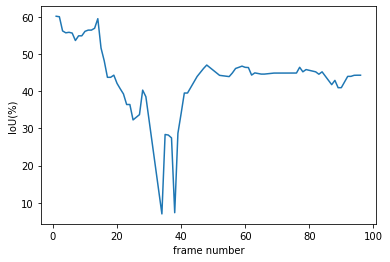

In [843]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('./KylianMbappe.mp4')

ret, frame = cap.read()

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
face_boxes = face_detector.detectMultiScale(frame)

if len(face_boxes) == 0:
    print('no face detected')
    assert(False)

(x,y,w,h) = tuple(face_boxes[0])
track_window = (x,y,w,h)

roi = frame[y:y+h, x:x+w]

gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blur_roi = cv2.GaussianBlur(gray_roi, (5,5), 7)
Ix_roi = cv2.Sobel(blur_roi, cv2.CV_64F, 1, 0, ksize=5)
Iy_roi = cv2.Sobel(blur_roi, cv2.CV_64F, 0, 1, ksize=5)
mag_roi, ang_roi = cv2.cartToPolar(Ix_roi, Iy_roi, angleInDegrees=True)

mask = cv2.inRange(mag_roi, 0.1*mag_roi.max(), mag_roi.max())

roi_hist = cv2.calcHist([np.uint16(ang_roi)],[0],mask,[100],[0,360])

cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10 , 1)

graph_list = np.zeros(shape=(1,2))
frame_cnt_ori = cap.get(cv2.CAP_PROP_POS_FRAMES)

while True:
    ret, frame = cap.read()

    if ret == True:
        boxA = []
        boxB = [] 
        frame_cnt = cap.get(cv2.CAP_PROP_POS_FRAMES) - frame_cnt_ori
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5,5), 7)
        Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
        Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
        mag, ang = cv2.cartToPolar(Ix, Iy, angleInDegrees=True)

        ang[mag < 0.1 * mag.max()] = 0

        dst = cv2.calcBackProject([np.uint16(ang)], [0], roi_hist, [0,360], 1)

        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        x, y, w, h = track_window
        boxA = [x, x+w, y, y+h]
        
        img = cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 5)

        face_boxes = face_detector.detectMultiScale(frame)

        if len(face_boxes) != 0:
            (x, y, w, h) = tuple(face_boxes[0])
            boxB = [x, x+w, y, y+h]
            img = cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),5)
            iou = calc_IOU(boxA, boxB)
        else:
            iou = 0
        
        if iou!=0:
            graph_list = np.concatenate((graph_list, np.array([[frame_cnt, iou]])), axis=0)

        cv2.putText(img, "IoU: {:.4f}".format(iou), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        cv2.putText(img, "FrameCount: {:.4f}".format(frame_cnt), (10, 50),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        if frame_cnt == 1 or frame_cnt == 34:
            if frame_cnt==34:
                # cv2.imwrite('image_low_iou.jpg', img)
                plt.title("image_low_iou")
                plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
                plt.show()
            if frame_cnt==1:
                # cv2.imwrite('image_high_iou.jpg', img)
                plt.title("image_high_iou")
                plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
                plt.show()

        cv2.imshow('mean shift trackign demo', img)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    else:
        break


plt.plot(graph_list[1:,0], graph_list[1:,1]*100)
plt.xlabel("frame number")
plt.ylabel("IoU(%)")
plt.show()
cv2.destroyAllWindows()
cap.release()








# BLUE = Viola-Jones detected box 
# RED = tracked bounding box

In [844]:
# print(max(graph_list[1:,1]))
print(np.where(graph_list[1:,1] == max(graph_list[1:,1]))[0]) #res = 0
print(np.where(graph_list[1:,1] == min(graph_list[1:,1]))[0]) #res = 28

print("Highest IoU at frame number:", graph_list[1:,0][0])
print("lowest IoU at frame number:", graph_list[1:,0][28])

[0]
[28]
Highest IoU at frame number: 1.0
lowest IoU at frame number: 34.0


## In your report, include a sample frame in which the IoU is large (e.g. over 50%) and another sample frame in which the IoU is low (e.g. below 10%). Draw the tracked and detected bounding boxes in each frame using different colours (and indicate which is which).

sample frames recorded in result2 folder, and also above. Here the blue is Viola-Jones detected box, and red is tracked bounding box

## Report the percentage of frames in which the IoU is larger than 50%.

In [846]:
larger_then_50 = 0
for i in graph_list[1:,1]:
    if i > 0.5:
        larger_then_50+=1
    
print("percentage of frames in which the IoU is larger than 50%: ", ((larger_then_50)/len(graph_list[1:,1]))*100,"%")

percentage of frames in which the IoU is larger than 50%:  21.73913043478261 %


percentage where IoU is larger than 50% is 21.74%